## 発現変動遺伝子解析 (DEseq2) の結果をMA plotとして可視化する (T>C read)
`DESeq2`で検出された発現変動遺伝子について解析。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# color-blind safe color scheme from https://personal.sron.nl/~pault/#fig:scheme_bright
blue, cyan, green, yellow = "#4477AA", "#66CCEE", "#228833", "#CCBB44"
red, purple, grey, black = "#EE6677", "#AA3377", "#BBBBBB", "#333333"

DESeq2で検定したデータをもとにq_value < 0.05, Fold Change 1.5倍以上の遺伝子を発現変動遺伝子としてMA plotを作る。

In [2]:
# Set threshold of q_value
q_value = 0.05
FC_threshold = 1.5

def is_deg(df):
    log2FC = np.log2(FC_threshold)
    if (df["q.value"] < q_value) & (df["log2FC"] > log2FC ):
        return "up"
    elif (df["q.value"] < q_value) & (df["log2FC"] < -log2FC):
        return "down"
    else:
        return "ns"

### MA plot

In [21]:
df1 = pd.read_csv("../rscript/deseq2_v2/result/Total_DMSOvsTPG_TC_DESeq2.txt", sep="\t", index_col="rownames(tcReadCount)")
df2 = pd.read_csv("../rscript/deseq2_v2/result/P-TRAP_DMSOvsTPG_TC_DESeq2.txt", sep="\t", index_col="rownames(tcReadCount)")
df3 = pd.read_csv("../rscript/deseq2_v2/result/L10a-TRAP_DMSOvsTPG_TC_DESeq2.txt", sep="\t", index_col="rownames(tcReadCount)")

# リードカウント0のサンプルが1つ以上ある遺伝子を除外
df1["zero"] = df1.iloc[:, 0:6].apply(lambda s: (s == 0).sum(), axis=1)
df2["zero"] = df2.iloc[:, 0:6].apply(lambda s: (s == 0).sum(), axis=1)
df3["zero"] = df3.iloc[:, 0:6].apply(lambda s: (s == 0).sum(), axis=1)
df1 = df1[df1["zero"] == 0]
df2 = df2[df2["zero"] == 0]
df3 = df3[df3["zero"] == 0]

df1["log2_baseMean"] = df1["baseMean"].apply(lambda x: np.log2(x))    # Make log2_baseMean (x axis of MA plot)
df2["log2_baseMean"] = df2["baseMean"].apply(lambda x: np.log2(x))    # Make log2_baseMean (x axis of MA plot)
df3["log2_baseMean"] = df3["baseMean"].apply(lambda x: np.log2(x))    # Make log2_baseMean (x axis of MA plot)

df1["deg"] = df1.apply(is_deg, axis=1) 
df2["deg"] = df2.apply(is_deg, axis=1)
df3["deg"] = df3.apply(is_deg, axis=1)    

df1.to_csv("../results/tables/DESeq2_RNA_TcReadCount.csv")
df2.to_csv("../results/tables/DESeq2_P0_TcReadCount.csv")
df3.to_csv("../results/tables/DESeq2_L10a_TcReadCount.csv")

df1.head()

,DMSO.Total.1,DMSO.Total.2,DMSO.Total.3,TPG.Total.1,TPG.Total.2,TPG.Total.3,p.value,q.value,ranking,log2FC,lfcSE,baseMean,stat,zero,log2_baseMean,deg
rownames(tcReadCount),,,,,,,,,,,,,,,,
SAMD11|ENSG00000187634.13|chr1,545,396,454,480,572,430,0.999737,0.999737,13635.0,-0.000047,0.142302,474.899522,-0.000330,0,8.891478,ns
NOC2L|ENSG00000188976.11|chr1,164,100,201,129,111,132,0.134904,0.446378,3210.0,-0.408399,0.273170,139.250679,-1.495038,0,7.121541,ns
HES4|ENSG00000188290.11|chr1,203,177,146,255,227,222,0.086134,0.355706,2495.0,0.332782,0.193911,202.529262,1.716153,0,7.661987,ns
ISG15|ENSG00000187608.10|chr1,19,3,2,11,8,9,0.851581,1.000000,12048.0,0.189549,1.013079,8.394194,0.187102,0,3.069392,ns
AGRN|ENSG00000188157.15|chr1,43,20,42,23,14,17,0.056872,1.000000,1985.0,-1.043462,0.547952,26.464898,-1.904293,0,4.726008,ns


Up: 315, Down: 128 (q.value < 0.05, FC threshold: 1.5)
Up: 262, Down: 401 (q.value < 0.05, FC threshold: 1.5)
Up: 230, Down: 321 (q.value < 0.05, FC threshold: 1.5)


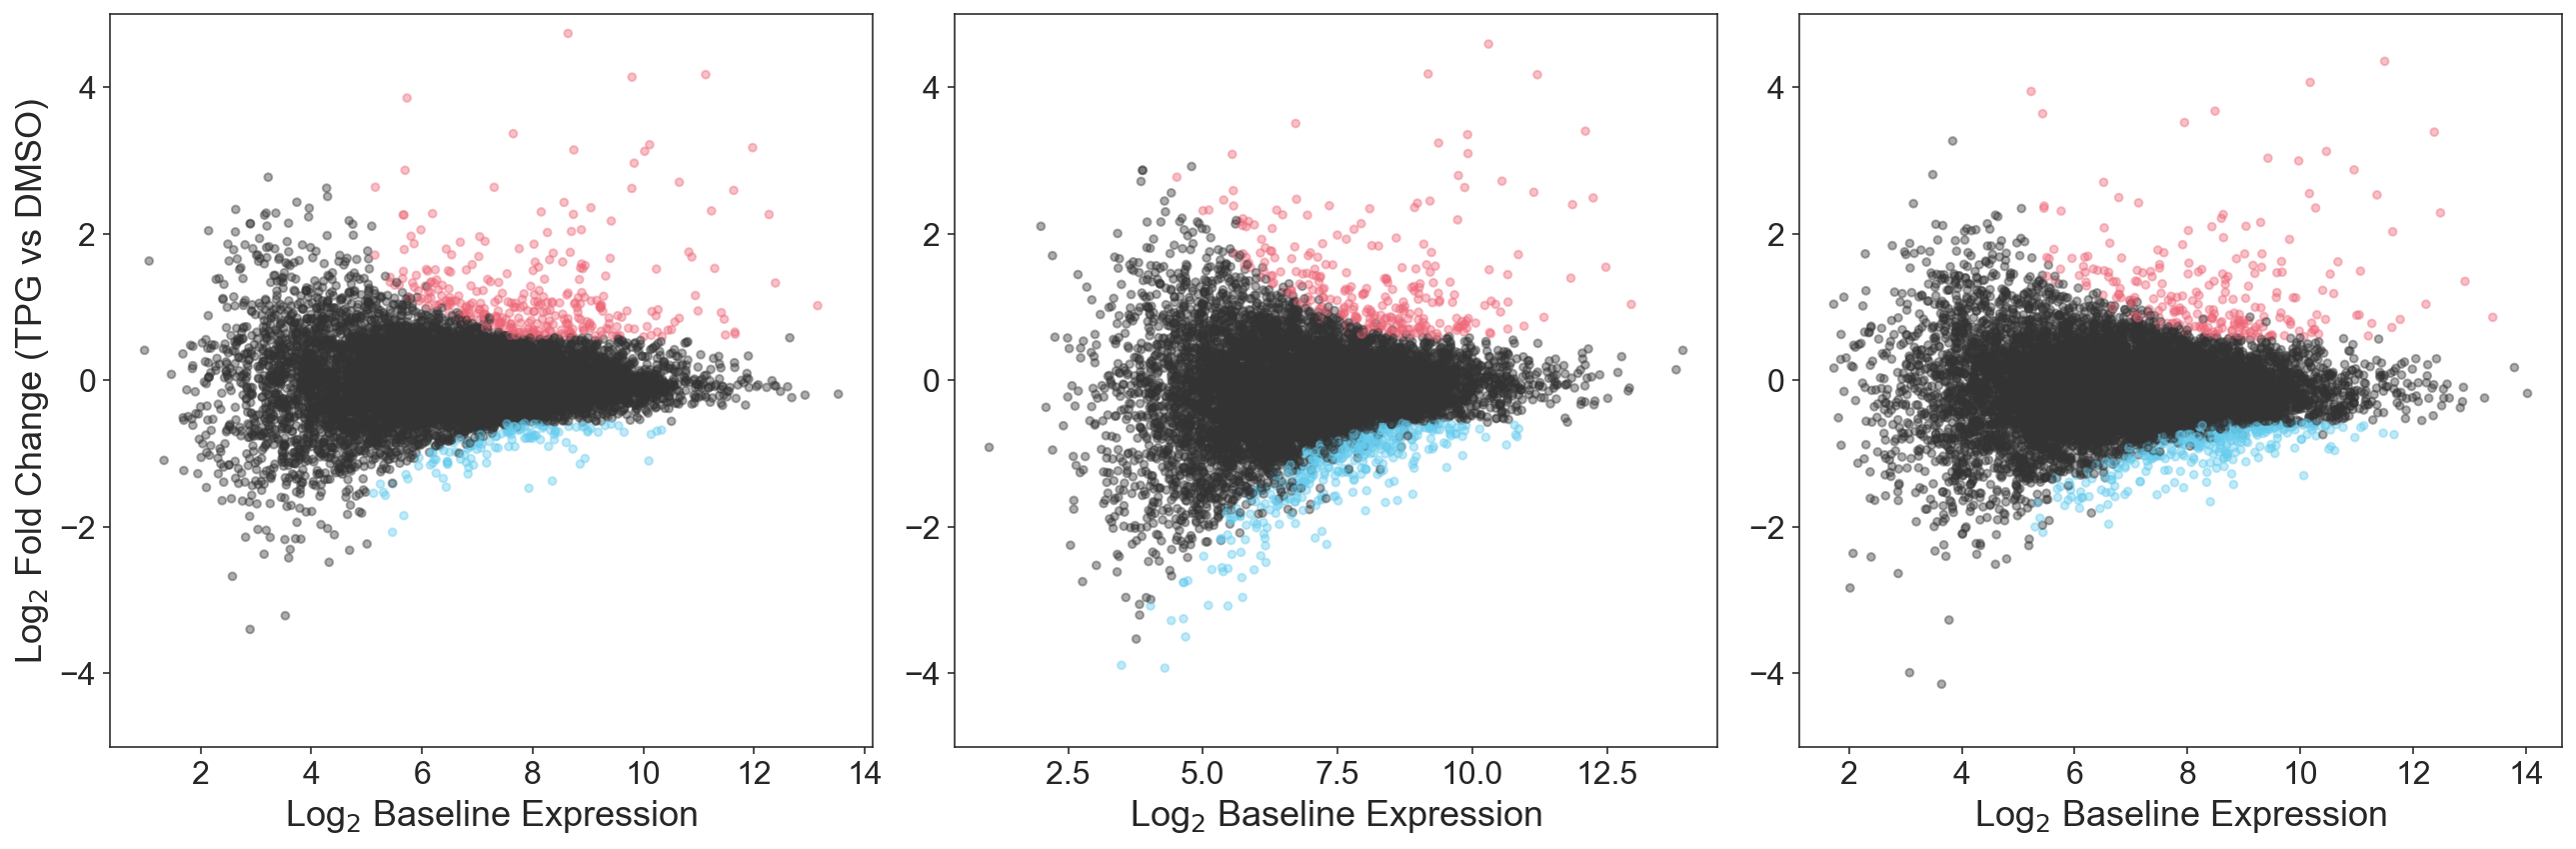

In [22]:
fig = plt.figure(figsize=(18, 6), tight_layout=True)
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

color = {"up":red, "down":cyan, "ns":black}

for ax, df in zip((ax1, ax2, ax3), (df1, df2, df3)):
    ax.tick_params(direction="out", labelsize=16)
    ax.set_xlabel("Log" + "$_{2}$" + " Baseline Expression", fontsize=18)
    ax1.set_ylabel("Log" + "$_{2}$" + " Fold Change (TPG vs DMSO)", fontsize=18)
    ax.set_ylim(-5, 5)
    ax.scatter(df["log2_baseMean"], df["log2FC"],  color=df["deg"].map(color), alpha=0.4, s=15)
    
    genes_up = len(df[df["deg"] == "up"])
    genes_down =  len(df[df["deg"] == "down"])
    print(f"Up: {genes_up}, Down: {genes_down} (q.value < {q_value}, FC threshold: {FC_threshold})")

fig.savefig("../results/figure_5/DESeq2_MAplot_TcReadCount.pdf", bbox_inches="tight", transparent=True)

コメント: 転写因子の標的が T>C reads のみで上昇していて Non-T>C reads で上昇していない → 検出漏れ (Non-T>C reads の中に新規合成RNAが混じっている) が少ないことの根拠の一つになる？

## 小胞体ストレス関連遺伝子の発現がTPG処理で上昇しているかどうか調べる¶
小胞体ストレス応答で発現が上がる典型的な遺伝子 (PDIA4, XBP1, HERPUD1, HSPA5, DDIT3, DNAJC3) についてThapsigargine処理でCPMが上昇しているかどうか調べる。

In [6]:
df1 = pd.read_csv("../slamdunk/csv/allreads.csv", index_col=["Chromosome", "Start", "End", "Name", "Length", "Strand"])
df2 = pd.read_csv("../slamdunk/csv/tcreads.csv", index_col=["Chromosome", "Start", "End", "Name", "Length", "Strand"])

# counts per million
def normalized_cpm(df_target, df_used):
    return 10 ** 6 * df_target / df_used.sum()

def get_gene_name(df):
    return df["index"].split("|")[0]

df_cpm = normalized_cpm(df2, df1)  # ReadCount の値で TcReadCount の値をCPM正規化
df_cpm["index"] = df_cpm.index.get_level_values(3)
df_cpm["gene"] = df_cpm.apply(get_gene_name, axis=1)

df_cpm = df_cpm.drop(columns="index")

df_cpm.head()

DRR438599  \
Chromosome Start  End    Name                       Length Strand              
chr1       70009  71585  OR4F5|ENSG00000186092.7    1576   +        0.000000   
           944154 944574 SAMD11|ENSG00000187634.13  420    +       65.159759   
           944203 944693 NOC2L|ENSG00000188976.11   490    -       19.607707   
           965192 965719 KLHL17|ENSG00000187961.15  527    +        1.195592   
           974576 975865 PLEKHN1|ENSG00000187583.11 1289   +        0.000000   

                                                                   DRR438600  \
Chromosome Start  End    Name                       Length Strand              
chr1       70009  71585  OR4F5|ENSG00000186092.7    1576   +        0.000000   
           944154 944574 SAMD11|ENSG00000187634.13  420    +       54.032068   
           944203 944693 NOC2L|ENSG00000188976.11   490    -       13.644462   
           965192 965719 KLHL17|ENSG00000187961.15  527    +        0.000000   
           974576 975865 PLEKHN1|ENSG00000187583.11 1289   +        0.545778   

                                                                   DRR438601  \
Chromosome Start  End    Name                       Length Strand              
chr1       70009  71585  OR4F5|ENSG00000186092.7    1576   +        0.000000   
           944154 944574 SAMD11|ENSG00000187634.13  420    +       61.517915   
           944203 944693 NOC2L|ENSG00000188976.11   490    -       27.235905   
           965192 965719 KLHL17|ENSG00000187961.15  527    +        1.626024   
           974576 975865 PLEKHN1|ENSG00000187583.11 1289   +        0.406506   

                                                                   DRR438602  \
Chromosome Start  End    Name                       Length Strand              
chr1       70009  71585  OR4F5|ENSG00000186092.7    1576   +        0.000000   
           944154 944574 SAMD11|ENSG00000187634.13  420    +       58.632220   
           944203 944693 NOC2L|ENSG00000188976.11   490    -       15.757409   
           965192 965719 KLHL17|ENSG00000187961.15  527    +        3.664514   
           974576 975865 PLEKHN1|ENSG00000187583.11 1289   +        0.000000   

                                                                   DRR438603  \
Chromosome Start  End    Name                       Length Strand              
chr1       70009  71585  OR4F5|ENSG00000186092.7    1576   +        0.000000   
           944154 944574 SAMD11|ENSG00000187634.13  420    +       71.023583   
           944203 944693 NOC2L|ENSG00000188976.11   490    -       13.782548   
           965192 965719 KLHL17|ENSG00000187961.15  527    +        4.345849   
           974576 975865 PLEKHN1|ENSG00000187583.11 1289   +        0.000000   

                                                                   DRR438604  \
Chromosome Start  End    Name                       Length Strand              
chr1       70009  71585  OR4F5|ENSG00000186092.7    1576   +        0.000000   
           944154 944574 SAMD11|ENSG00000187634.13  420    +       57.360384   
           944203 944693 NOC2L|ENSG00000188976.11   490    -       17.608304   
           965192 965719 KLHL17|ENSG00000187961.15  527    +        3.868491   
           974576 975865 PLEKHN1|ENSG00000187583.11 1289   +        0.000000   

                                                                   DRR438605  \
Chromosome Start  End    Name                       Length Strand              
chr1       70009  71585  OR4F5|ENSG00000186092.7    1576   +        0.000000   
           944154 944574 SAMD11|ENSG00000187634.13  420    +       78.546381   
           944203 944693 NOC2L|ENSG00000188976.11   490    -        8.292287   
           965192 965719 KLHL17|ENSG00000187961.15  527    +        1.266877   
           974576 975865 PLEKHN1|ENSG00000187583.11 1289   +        0.000000   

                                                                   DRR438606  \
Chromosome Start  End    Name                       Length S

In [7]:
df_cpm.columns = ["DMSO-Total"] * 3 + ["TPG-Total"] * 3 + ["DMSO-P0"] * 3 + ["TPG-P0"] * 3 + ["DMSO-L10a"] * 3 + ["TPG-L10a"] * 3 + ["gene"]
df_melt = pd.melt(df_cpm, id_vars="gene")

df_melt.head()

,gene,variable,value
0,OR4F5,DMSO-Total,0.000000
1,SAMD11,DMSO-Total,65.159759
2,NOC2L,DMSO-Total,19.607707
3,KLHL17,DMSO-Total,1.195592
4,PLEKHN1,DMSO-Total,0.000000


In [8]:
def get_condition(df):
    return df["variable"].split("-")[0]

def get_protocol(df):
    method = df["variable"].split("-")[1]
    if method != "Total":
        return method
    else:
        return "RNA"

df_melt["condition"] = df_melt.apply(get_condition, axis=1)
df_melt["protocol"] = df_melt.apply(get_protocol, axis=1)

df_melt.head()

,gene,variable,value,condition,protocol
0,OR4F5,DMSO-Total,0.000000,DMSO,RNA
1,SAMD11,DMSO-Total,65.159759,DMSO,RNA
2,NOC2L,DMSO-Total,19.607707,DMSO,RNA
3,KLHL17,DMSO-Total,1.195592,DMSO,RNA
4,PLEKHN1,DMSO-Total,0.000000,DMSO,RNA


In [9]:
df_melt = df_melt.sort_values("protocol", ascending=False)

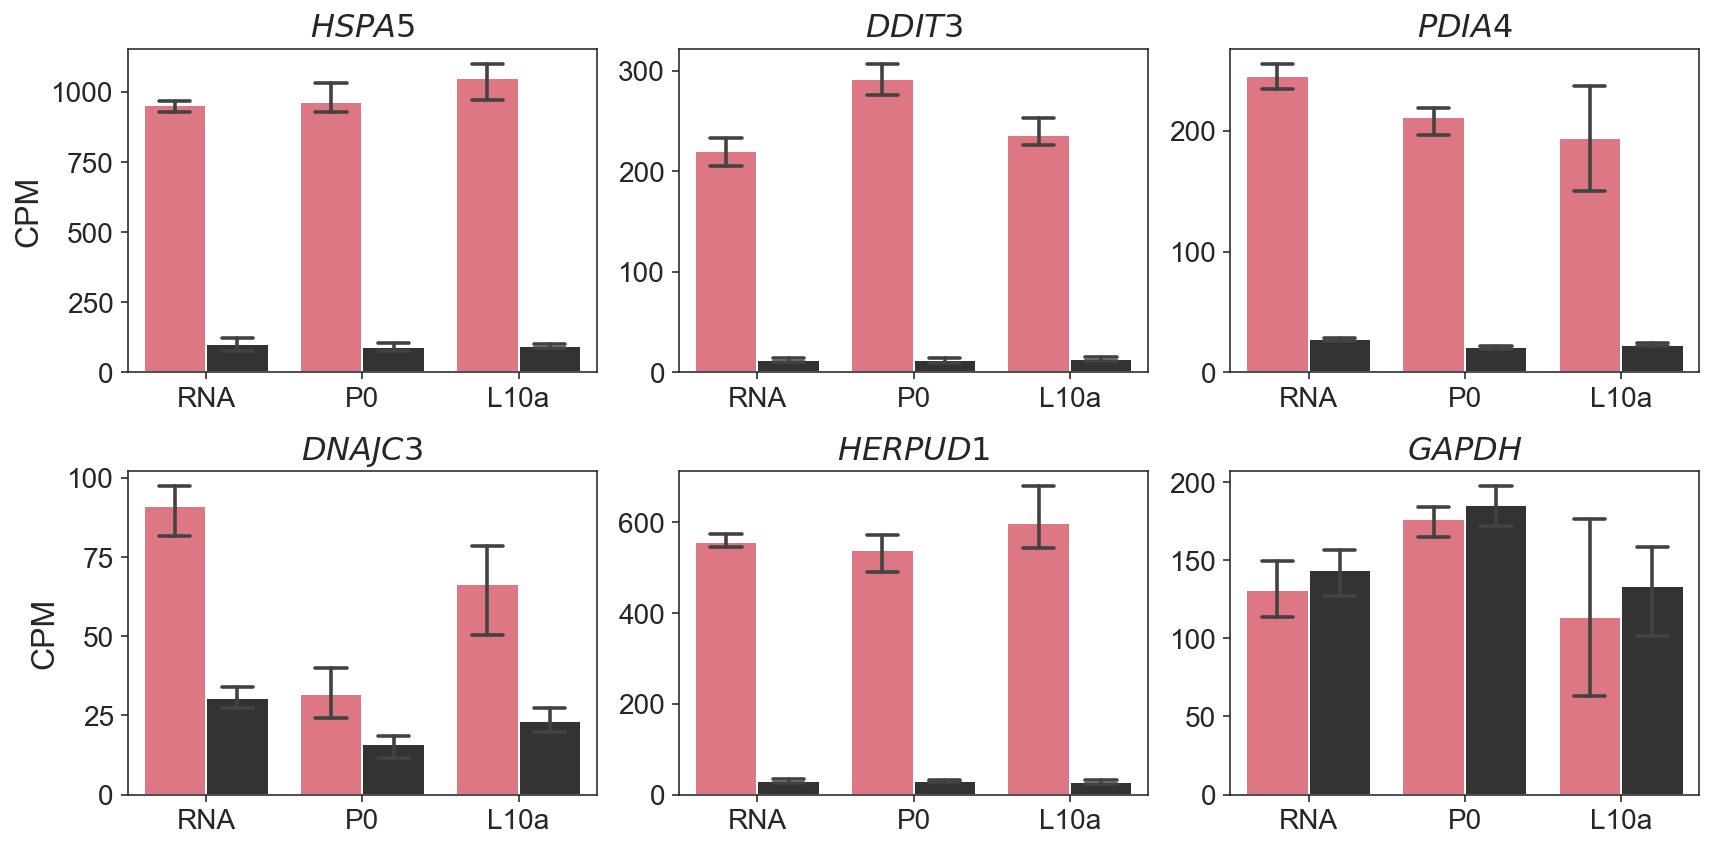

In [10]:
sns.set_style("ticks")
fig = plt.figure(figsize=(12, 6), tight_layout=True)
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

palette = {"DMSO":black, "TPG":red}

for ax, gene in zip((ax1, ax2, ax3, ax4, ax5, ax6), ("HSPA5", "DDIT3", "PDIA4", "DNAJC3", "HERPUD1", "GAPDH")):
    
    tmp = df_melt[df_melt["gene"] == gene]
    sns.barplot(x="protocol", y="value", hue="condition", palette=palette, data=tmp, ax=ax, capsize=0.2, errwidth=1.8)

    ax.tick_params(direction="out", labelsize=14)
    ax.get_legend().set_visible(False)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(f"$\it{gene}$", fontsize=16)

ax1.set_ylabel("CPM", fontsize=16)
ax4.set_ylabel("CPM", fontsize=16)

fig.savefig("../results/figure_5/BarPlot_TcReadCount.pdf", bbox_inches="tight", transparent=True)

### それぞれの方法で発現変動遺伝子がどの程度被っているか調べる

In [26]:
df1 = pd.read_csv("../results/tables/DESeq2_RNA_TcReadCount.csv", index_col="rownames(tcReadCount)")
df2 = pd.read_csv("../results/tables/DESeq2_P0_TcReadCount.csv", index_col="rownames(tcReadCount)")
df3 = pd.read_csv("../results/tables/DESeq2_L10a_TcReadCount.csv", index_col="rownames(tcReadCount)")

In [12]:
from matplotlib_venn import venn2, venn3

In [27]:
DEGs_up_RNA = set(df1[df1["deg"] == "up"].index)
DEGs_up_P0 = set(df2[df2["deg"] == "up"].index)
DEGs_up_L10a = set(df3[df3["deg"] == "up"].index)

DEGs_down_RNA = set(df1[df1["deg"] == "down"].index)
DEGs_down_P0 = set(df2[df2["deg"] == "down"].index)
DEGs_down_L10a = set(df3[df3["deg"] == "down"].index)

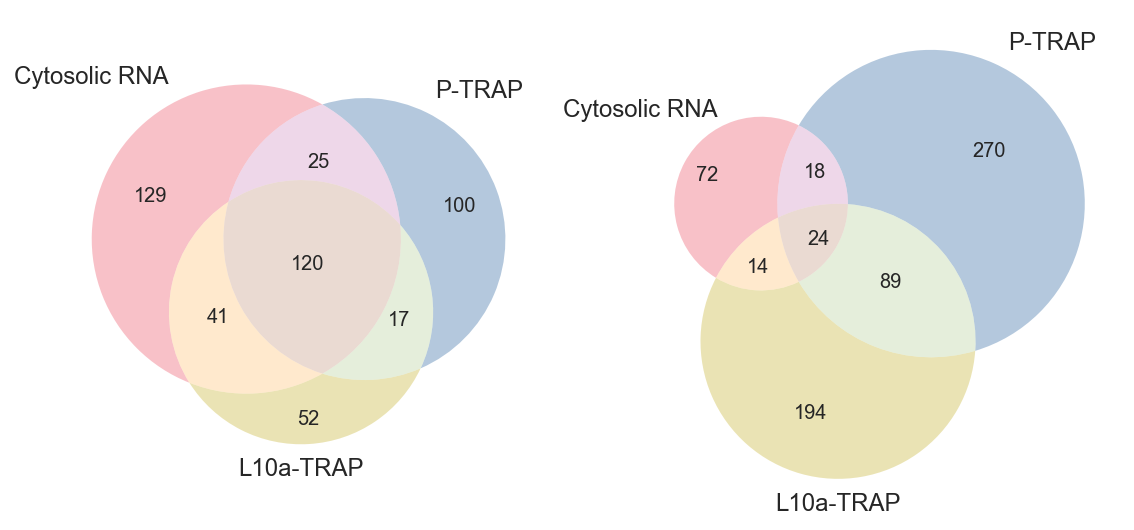

In [28]:
fig = plt.figure(figsize=(8, 6), tight_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

venn3([DEGs_up_RNA, DEGs_up_P0, DEGs_up_L10a], set_labels=("Cytosolic RNA", "P-TRAP", "L10a-TRAP"), set_colors=(red, blue, yellow), ax=ax1)
venn3([DEGs_down_RNA, DEGs_down_P0, DEGs_down_L10a], set_labels=("Cytosolic RNA", "P-TRAP", "L10a-TRAP"), set_colors=(red, blue, yellow), ax=ax2)

fig.savefig("../results/figure_5/Venn_TC.pdf", bbox_inches="tight", transparent=True)

### Total RNA と T>C で発現変動遺伝子が変化しているかどうか調べる。

In [35]:
df1_all = pd.read_csv("../results/tables/DESeq2_RNA_ReadCount.csv", index_col="rownames(readCount)")
df2_all = pd.read_csv("../results/tables/DESeq2_P0_ReadCount.csv", index_col="rownames(readCount)")
df3_all = pd.read_csv("../results/tables/DESeq2_L10a_ReadCount.csv", index_col="rownames(readCount)")
df1_tc = pd.read_csv("../results/tables/DESeq2_RNA_TcReadCount.csv", index_col="rownames(tcReadCount)")
df2_tc = pd.read_csv("../results/tables/DESeq2_P0_TcReadCount.csv", index_col="rownames(tcReadCount)")
df3_tc = pd.read_csv("../results/tables/DESeq2_L10a_TcReadCount.csv", index_col="rownames(tcReadCount)")

all_DEGs_up_RNA = set(df1_all[df1_all["deg"] == "up"].index)
all_DEGs_up_P0 = set(df2_all[df2_all["deg"] == "up"].index)
all_DEGs_up_L10a = set(df3_all[df3_all["deg"] == "up"].index)
all_DEGs_down_RNA = set(df1_all[df1_all["deg"] == "down"].index)
all_DEGs_down_P0 = set(df2_all[df2_all["deg"] == "down"].index)
all_DEGs_down_L10a = set(df3_all[df3_all["deg"] == "down"].index)

tc_DEGs_up_RNA = set(df1_tc[df1_tc["deg"] == "up"].index)
tc_DEGs_up_P0 = set(df2_tc[df2_tc["deg"] == "up"].index)
tc_DEGs_up_L10a = set(df3_tc[df3_tc["deg"] == "up"].index)
tc_DEGs_down_RNA = set(df1_tc[df1_tc["deg"] == "down"].index)
tc_DEGs_down_P0 = set(df2_tc[df2_tc["deg"] == "down"].index)
tc_DEGs_down_L10a = set(df3_tc[df3_tc["deg"] == "down"].index)

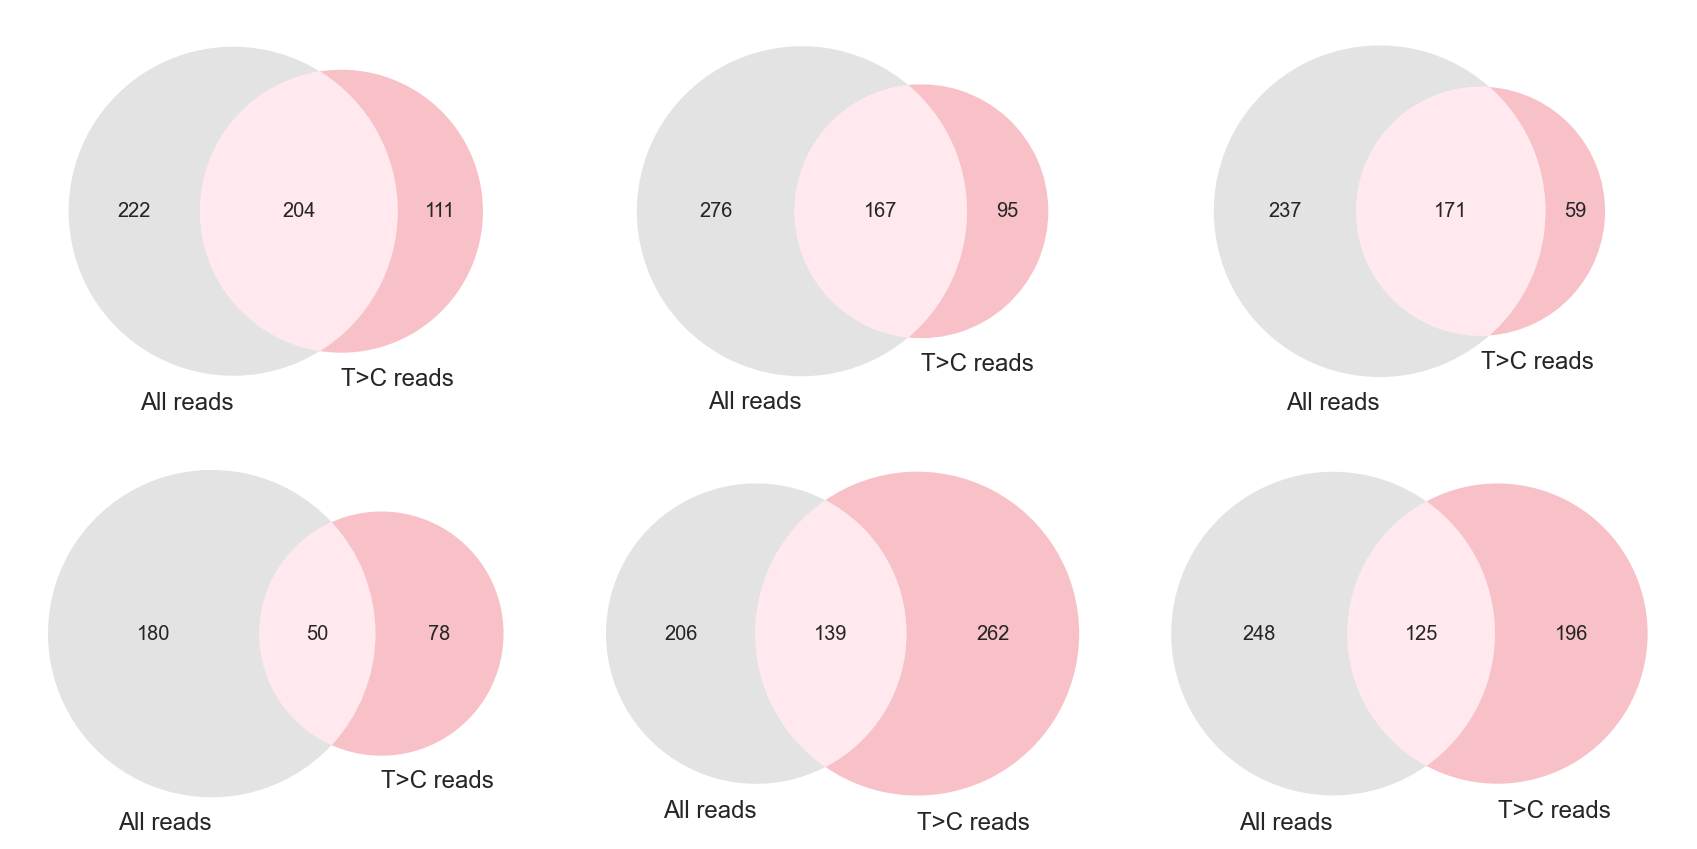

In [36]:
fig = plt.figure(figsize=(12, 6), tight_layout=True)
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

venn2([all_DEGs_up_RNA, tc_DEGs_up_RNA], set_labels=("All reads", "T>C reads"), set_colors=(grey, red), ax=ax1)
venn2([all_DEGs_up_P0, tc_DEGs_up_P0], set_labels=("All reads", "T>C reads"), set_colors=(grey, red), ax=ax2)
venn2([all_DEGs_up_L10a, tc_DEGs_up_L10a], set_labels=("All reads", "T>C reads"), set_colors=(grey, red), ax=ax3)

venn2([all_DEGs_down_RNA, tc_DEGs_down_RNA], set_labels=("All reads", "T>C reads"), set_colors=(grey, red), ax=ax4)
venn2([all_DEGs_down_P0, tc_DEGs_down_P0], set_labels=("All reads", "T>C reads"), set_colors=(grey, red), ax=ax5)
venn2([all_DEGs_down_L10a, tc_DEGs_down_L10a], set_labels=("All reads", "T>C reads"), set_colors=(grey, red), ax=ax6)

fig.savefig("../results/figure_5/Venn_All_vs_TC.pdf", bbox_inches="tight", transparent=True)